In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2895 non-null   int64  
 1   MSZoning       2895 non-null   object 
 2   LotFrontage    2895 non-null   float64
 3   LotArea        2895 non-null   int64  
 4   Street         2895 non-null   object 
 5   LotShape       2895 non-null   object 
 6   LandContour    2895 non-null   object 
 7   Utilities      2895 non-null   object 
 8   LotConfig      2895 non-null   object 
 9   LandSlope      2895 non-null   object 
 10  Neighborhood   2895 non-null   object 
 11  Condition1     2895 non-null   object 
 12  Condition2     2895 non-null   object 
 13  BldgType       2895 non-null   object 
 14  HouseStyle     2895 non-null   object 
 15  OverallQual    2895 non-null   int64  
 16  OverallCond    2895 non-null   int64  
 17  YearBuilt      2895 non-null   int64  
 18  YearRemo

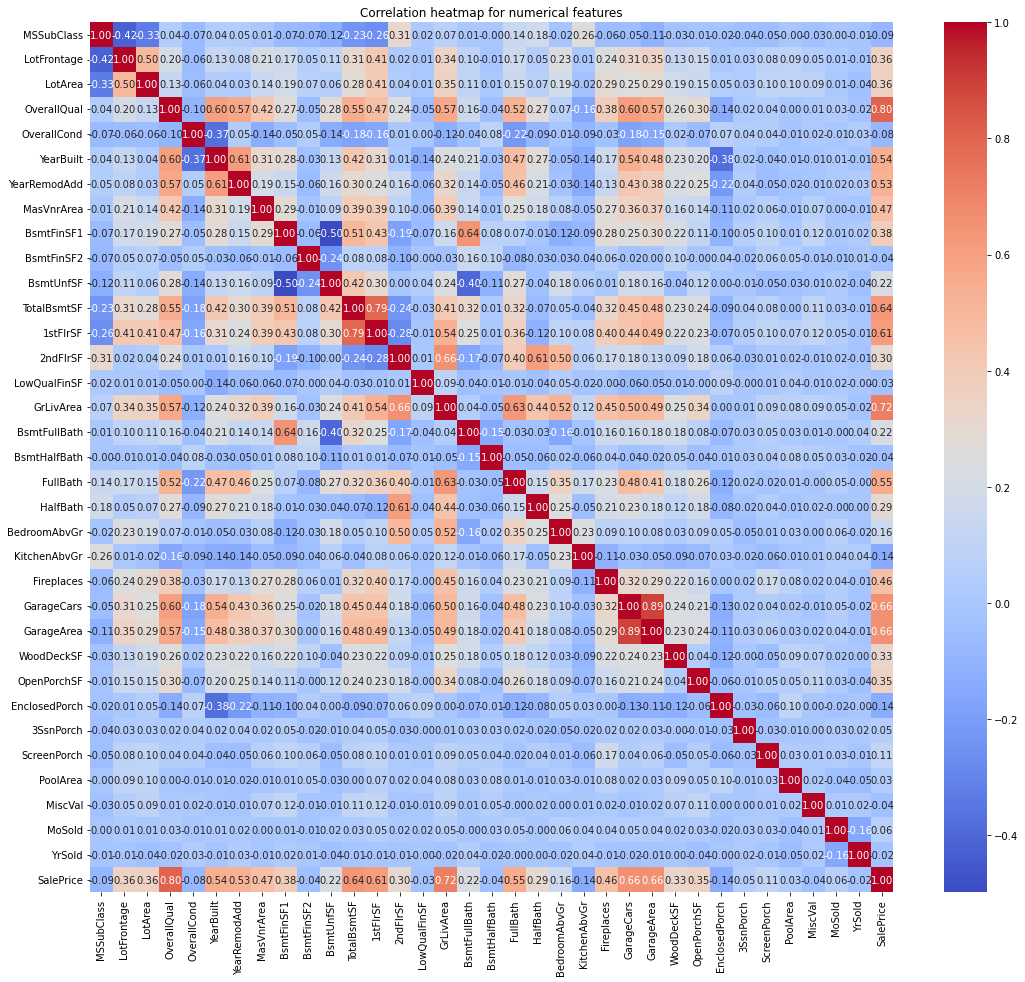

In [4]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap for numerical features');

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Data to be predicted
df_to_predict = df[df['SalePrice'].isnull()]
df_to_predict = df_to_predict.drop(['SalePrice'], axis = 1)

In [7]:
df = df.dropna()

In [8]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.ensemble import AdaBoostRegressor

In [167]:
model = AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=140)

In [168]:
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=140)

In [169]:
pred = model.predict(X_test)

In [170]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [171]:
r2_score(y_test, pred)

0.8608976102117125

In [172]:
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [173]:
MAE

19483.711150123716

In [174]:
RMSE

25519.23862549248

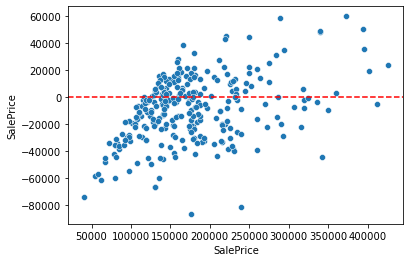

In [175]:
test_residuals = y_test - pred
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [21]:
from sklearn.model_selection import GridSearchCV

In [27]:
model = AdaBoostRegressor()

In [28]:
param_grid = {'n_estimators': [50, 100, 120],
              'loss':['linear', 'square', 'exponential'],
              'learning_rate': [.1, .5, 1, 10]}

In [29]:
grid = GridSearchCV(model,param_grid)

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 120]})

In [31]:
grid.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 50}

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
y_pred = grid.predict(X_test)

In [34]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [35]:
r2_score(y_test,y_pred)

0.8654320503521921

In [36]:
MAE

19204.968628219733

In [37]:
RMSE

25099.856291723674

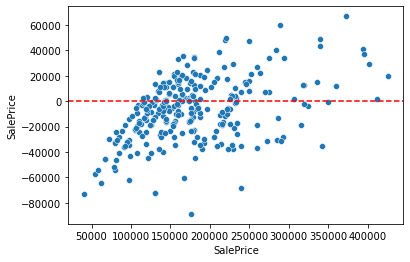

In [38]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [39]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__base_estimator': None,
 'estimator__learning_rate': 1.0,
 'estimator__loss': 'linear',
 'estimator__n_estimators': 50,
 'estimator__random_state': None,
 'estimator': AdaBoostRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [50, 100, 120],
  'loss': ['linear', 'square', 'exponential'],
  'learning_rate': [0.1, 0.5, 1, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [176]:
final_model = AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=140)

In [177]:
final_model.fit(X, y)

AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=140)

In [178]:
final_pred = final_model.predict(X)

In [179]:
r2_score(y, final_pred)

0.8893272724441237

In [180]:
MAE = mean_absolute_error(y,final_pred)
MSE = mean_squared_error(y,final_pred)
RMSE = np.sqrt(MSE)

In [181]:
MAE

19463.906386395905

In [182]:
RMSE

24838.237780343992

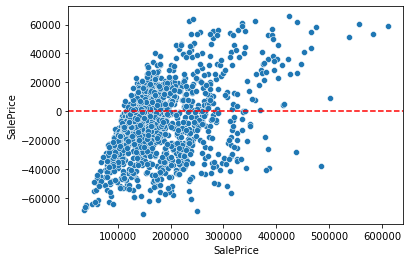

In [183]:
test_residuals = y - final_pred
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [184]:
result = final_model.predict(df_to_predict)

In [185]:
test = pd.read_csv('test.csv')

In [186]:
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':result})
submission['SalePrice'] = submission['SalePrice'].astype(int)
print(submission.shape)

(1459, 2)


In [187]:
submission['SalePrice']

0       128802
1       155347
2       170444
3       189168
4       219346
         ...  
1454    106666
1455    110410
1456    161534
1457    137725
1458    254660
Name: SalePrice, Length: 1459, dtype: int32

In [188]:
filename = 'house_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: house_preds.csv
